In [ ]:
!pip install tensorflow==2.8
!pip install keras==2.8

### Load

In [1]:
import os
import numpy as np
from music21 import converter, pitch, interval, instrument, note, stream
from matplotlib import pyplot as plt

from xen.visualise import plotPart, plotSequence
from xen.data.songdata import SongDataSet

data_dir = "../../../ml_data/music/mutopia_guitar/"

dataset = SongDataSet()
dataset.loadMidiDir(data_dir)

print(f'Loaded {len(dataset.songs)} Songs') 


Loading 385 files
Loaded 385 Songs


### Filter

In [2]:
dataset.filterTimeSig('4/4')


print(f'{len(dataset.songs)} Songs') 

95 Songs


In [3]:
sequences = []

ticksPerQuarter = 4   # 4 = 16th notes, to allow triplets would need to be 12 = 48 per measure
measuresPerSequence = 1

dataset.makeSequences(ticksPerQuarter, measuresPerSequence, '4/4')
print(dataset.sequences.shape)

dataset.compressSequences()
print(dataset.compressedSequences.shape)



Ignored 20 sequences from ../../../ml_data/music/mutopia_guitar/Matiegka3.mid
Ignored 2 sequences from ../../../ml_data/music/mutopia_guitar/capricho-arabe.mid
Ignored 24 sequences from ../../../ml_data/music/mutopia_guitar/carcassi-op60-03.mid
Ignored 3 sequences from ../../../ml_data/music/mutopia_guitar/horetzky29.mid
Ignored 84 sequences from ../../../ml_data/music/mutopia_guitar/sorf-op6n11.mid
Ignored 42 sequences from ../../../ml_data/music/mutopia_guitar/sorf-op6n07.mid
Ignored 69 sequences from ../../../ml_data/music/mutopia_guitar/claro-de-luna.mid
Ignored 70 sequences from ../../../ml_data/music/mutopia_guitar/moonlight-guitar-duo.mid
Ignored 1 sequences from ../../../ml_data/music/mutopia_guitar/bwv-1006a_3g.mid
Ignored 1 sequences from ../../../ml_data/music/mutopia_guitar/guitar-skole-no-09.mid
Ignored 2 sequences from ../../../ml_data/music/mutopia_guitar/Sor_Etude_Opus35_14.mid
Ignored 1 sequences from ../../../ml_data/music/mutopia_guitar/guitar-skole-no-05.mid
Ignored

In [18]:
import tensorflow as tf

inputShape = (dataset.compressedSequences.shape[1])
latentShape = (20)

# encoder model
encoderInput = tf.keras.layers.Input(shape = inputShape)
encoderOutput = tf.keras.layers.Dense(latentShape, activation = 'tanh')(encoderInput)
encoder = tf.keras.Model(encoderInput, encoderOutput)

# decoder model
decoderInput = tf.keras.layers.Input(shape = latentShape)
decoderOutput = tf.keras.layers.Dense(inputShape, activation = 'sigmoid')(decoderInput)
decoder = tf.keras.Model(decoderInput, decoderOutput)

# autoencoder model
autoencoder = tf.keras.Model(encoderInput, decoder(encoderOutput))

In [19]:

autoencoder.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

autoencoder.fit(dataset.compressedSequences, dataset.compressedSequences, epochs = 1000)


Epoch 1/1000
99/99 [==============================] - 1s 2ms/step - loss: 0.4750
Epoch 2/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.1390
Epoch 3/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 4/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 5/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 6/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 7/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 8/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 9/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 10/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 11/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 12/1000
99/99 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 13/1000
99/99 [====

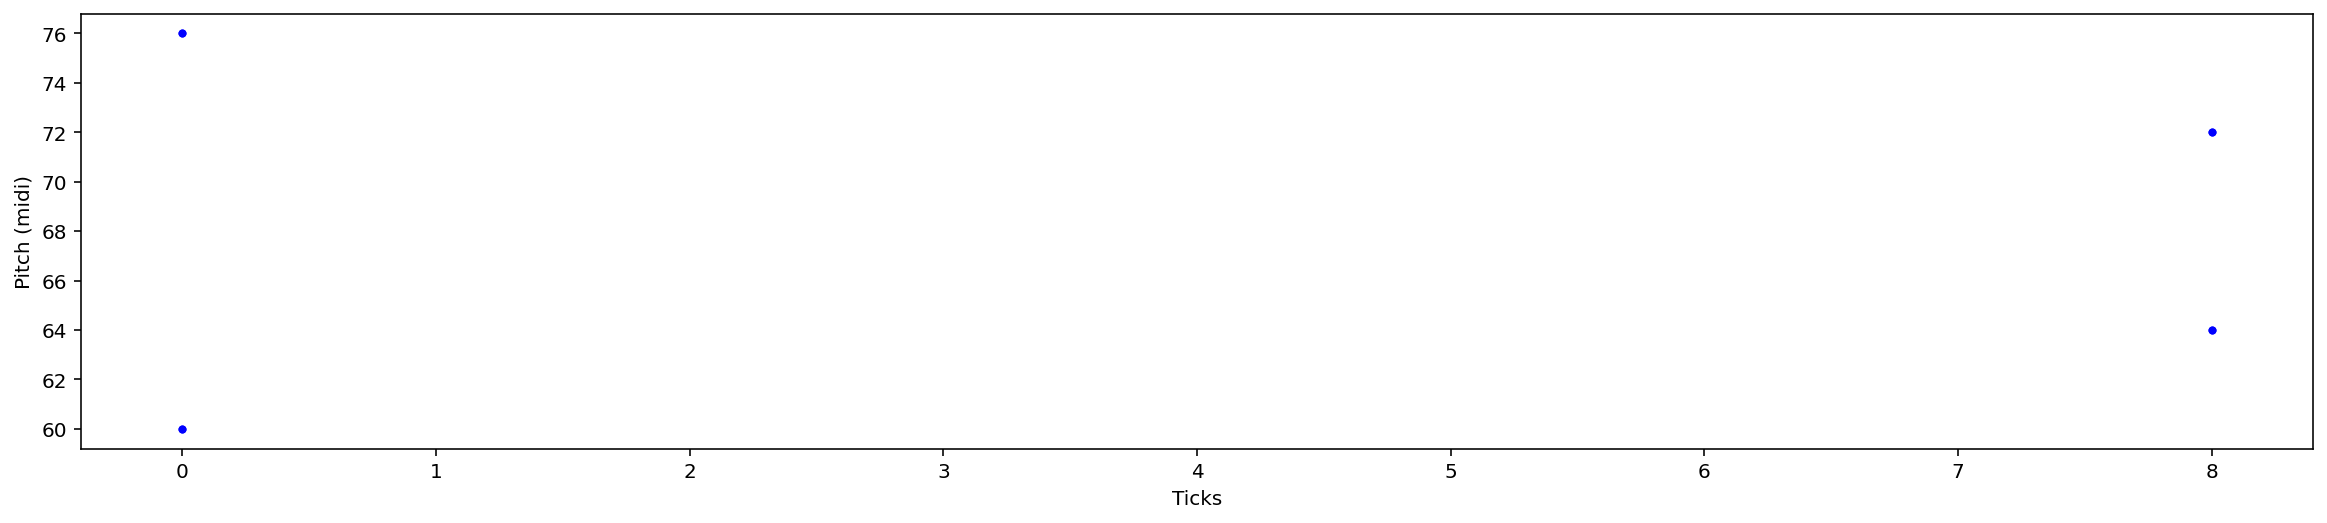

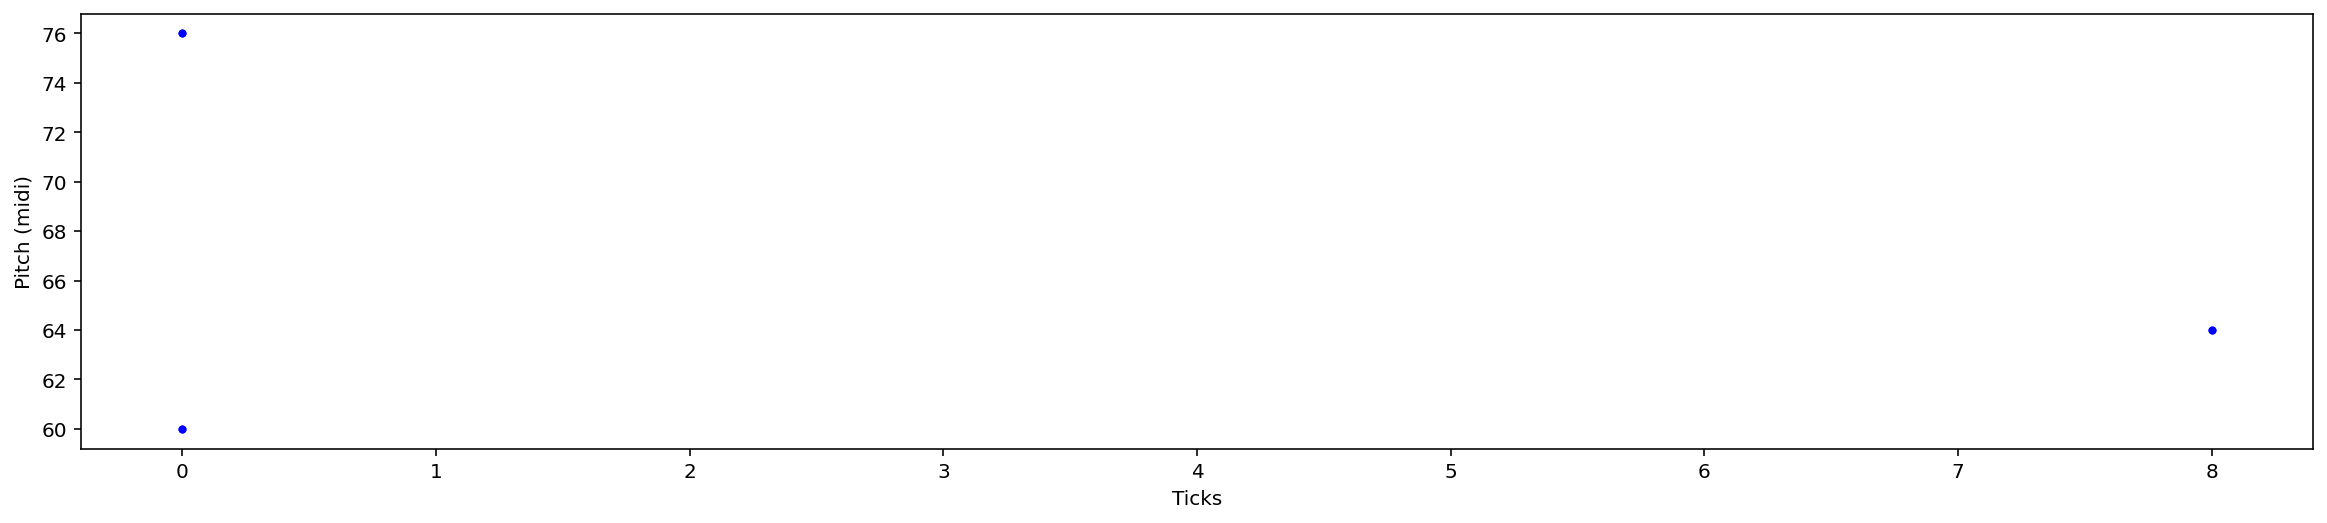

(1, 864)
0.78071785


In [20]:
input = np.array([dataset.compressedSequences[0]])

output = autoencoder.predict(input)

plotSequence(dataset.sequenceCompressor.decompress(dataset.compressedSequences[0]))
plotSequence(dataset.sequenceCompressor.decompress(output[0]))

print(output.shape)

maxout = 0
for out in output[0]:
    maxout = max(maxout, out)

print(maxout)
